# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras import models,layers,optimizers,utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras import regularizers

Using TensorFlow backend.


In [2]:
data=pd.read_csv("CarPrice_Assignment.csv")

In [3]:
data.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [4]:
data=data.drop(["car_ID","CarName"],axis=1)
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [5]:
{column: list(data[column].unique()) for column in data.columns if data.dtypes[column]=='object'}

{'fueltype': ['gas', 'diesel'],
 'aspiration': ['std', 'turbo'],
 'doornumber': ['two', 'four'],
 'carbody': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
 'drivewheel': ['rwd', 'fwd', '4wd'],
 'enginelocation': ['front', 'rear'],
 'enginetype': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'],
 'cylindernumber': ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
 'fuelsystem': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']}

In [6]:
numeric_ordering ={'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
data["cylindernumber"] =data["cylindernumber"].replace(numeric_ordering)

In [7]:
data["cylindernumber"]

0      4
1      4
2      6
3      4
4      5
      ..
200    4
201    4
202    6
203    6
204    4
Name: cylindernumber, Length: 205, dtype: int64

In [8]:
data["doornumber"]=data["doornumber"].apply(lambda data: 1 if data == 'two' else 0)

In [9]:
data["doornumber"]

0      1
1      1
2      1
3      0
4      0
      ..
200    0
201    0
202    0
203    0
204    0
Name: doornumber, Length: 205, dtype: int64

In [10]:
def binary_encode(x, columns, positive_values):
    x =x.copy()
    for column, positive_value in zip(columns, positive_values):
        x[column] = x[column].apply(lambda x: 1 if x == positive_value else 0)
    return x

binary_features=['fueltype','aspiration','enginelocation',]
binary_positive_values=['gas','std','rear']
data=binary_encode(data,columns=binary_features,positive_values=binary_positive_values)

In [11]:
def onehot_encode(x, columns, prefixes):
    x = x.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(x[column], prefix=prefix)
        x=pd.concat([x, dummies], axis=1)
        x=x.drop(column, axis=1)
    return x
features=['carbody','drivewheel','enginetype','fuelsystem']
prefixes=['MK','BS','DW','ET','FS']
data=onehot_encode(data,columns=features,prefixes=prefixes)

In [12]:
data.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,DW_ohcv,DW_rotor,ET_1bbl,ET_2bbl,ET_4bbl,ET_idi,ET_mfi,ET_mpfi,ET_spdi,ET_spfi
0,3,1,1,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:>

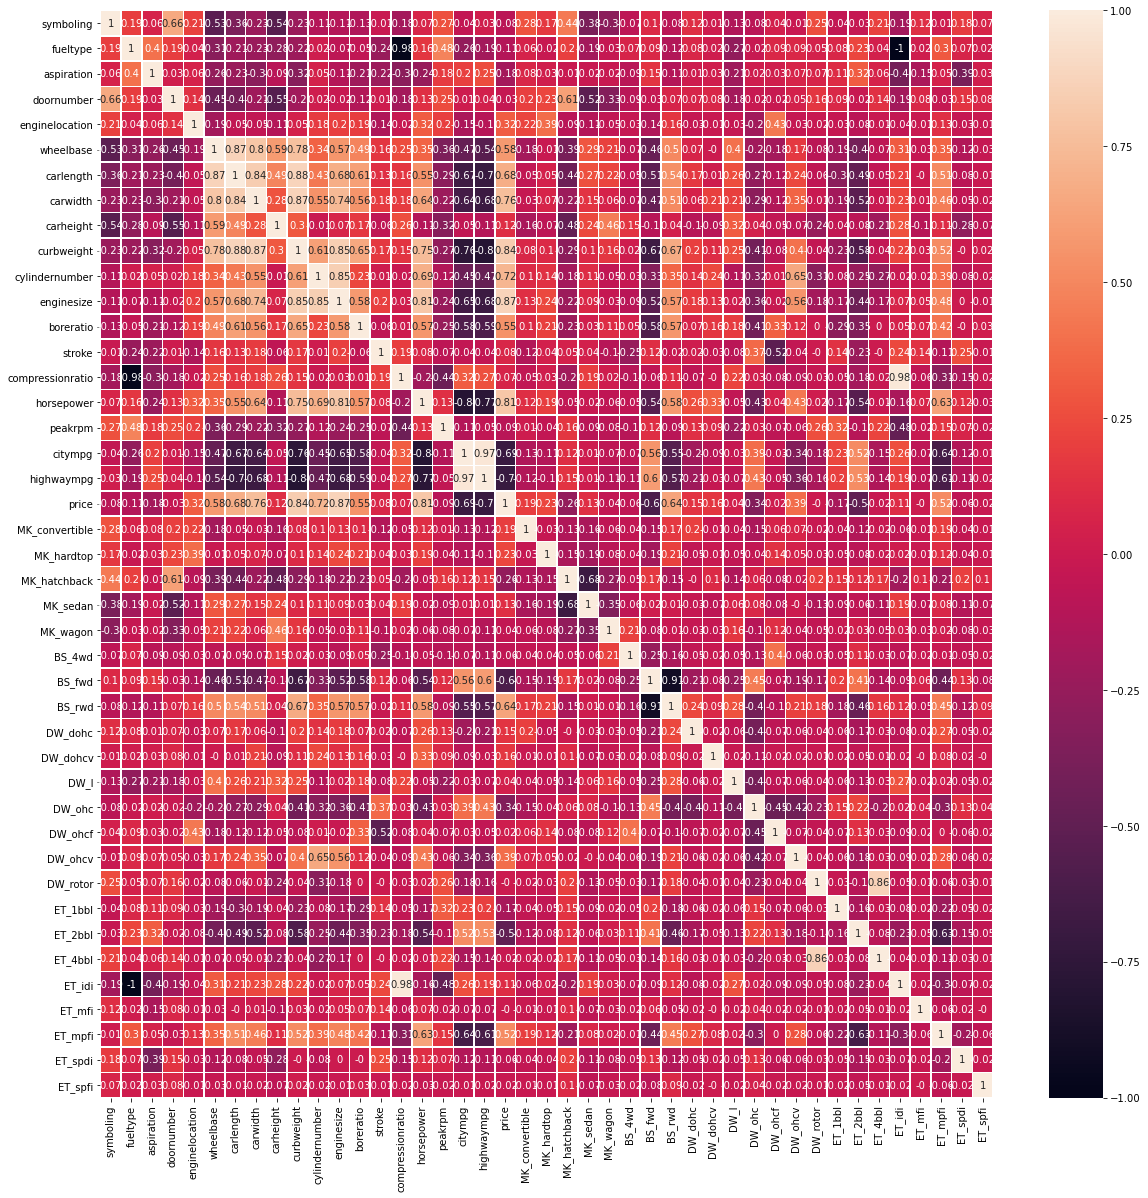

In [13]:
import seaborn as sns
correlation_matrix = data.corr().round(2)
fig, ax = plt.subplots(figsize=(20,20))
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True,linewidths=.5,ax=ax)

In [14]:
data=data.drop(["highwaympg","compressionratio"],axis=1)
data.head()
x=(data.loc[:,data.columns!= 'price'])
y=(data.loc[:,data.columns== 'price'])


In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=42)

In [16]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train =pd.DataFrame(scaler.transform(x_train),columns=x_train.columns)
x_test=pd.DataFrame(scaler.transform(x_test),columns=x_test.columns)

In [17]:
part_x_train,x_validation,part_y_train,y_validation=train_test_split(x_train,y_train,test_size=0.2,random_state=42)


In [18]:
x.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,DW_ohcv,DW_rotor,ET_1bbl,ET_2bbl,ET_4bbl,ET_idi,ET_mfi,ET_mpfi,ET_spdi,ET_spfi
0,3,1,1,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,1,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,1,0,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,0,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,0,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [19]:

model = Sequential()
model.add(Dense(50,input_shape=(40,), activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(80, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(20, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(Dense(55, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='rmsprop', metrics=['mae'])

In [20]:
network=model.fit(part_x_train,part_y_train,epochs=100,validation_data=(x_validation,y_validation))

Train on 114 samples, validate on 29 samples
Epoch 1/100
114/114 [==============================] - 1s 12ms/sample - loss: 202855105.6842 - mae: 12643.1016 - val_loss: 389473024.0000 - val_mae: 16412.3027
Epoch 2/100
114/114 [==============================] - 0s 281us/sample - loss: 202775696.5614 - mae: 12640.2422 - val_loss: 389246144.0000 - val_mae: 16406.7461
Epoch 3/100
114/114 [==============================] - 0s 289us/sample - loss: 202559874.5263 - mae: 12632.9795 - val_loss: 388656960.0000 - val_mae: 16392.6523
Epoch 4/100
114/114 [==============================] - 0s 307us/sample - loss: 202041767.0175 - mae: 12616.0771 - val_loss: 387369504.0000 - val_mae: 16362.2285
Epoch 5/100
114/114 [==============================] - 0s 281us/sample - loss: 201022817.4035 - mae: 12581.2432 - val_loss: 385043776.0000 - val_mae: 16307.4482
Epoch 6/100
114/114 [==============================] - 0s 298us/sample - loss: 199188659.3684 - mae: 12520.7383 - val_loss: 381080896.0000 - val_mae: 1

In [21]:
model.evaluate(x_test,y_test)


62/62 [==============================] - 0s 129us/sample - loss: 9277474.9355 - mae: 1850.2770


[9277474.935483871, 1850.277]

In [22]:
model.predict(x_test).sum()

746241.5